# Alzheimer's disease Classification

In this notebook, I will fit the models for Alzheimer's classification. I have three levels of disease Very Mild, Mild and Moderate. They all have different number of images for training - imbalanced classes. My No Tumar class has the most images and Modelate disease has very few images. My baseline is 50%.

In [1]:
# Imports
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.applications import EfficientNetV2S, Xception
from tensorflow.keras.regularizers import l2

import functions

import numpy as np
np.random.seed(18)

In [2]:
# Set image size
image_size = 240

In [3]:
# Load data fror training
al_train_ds, al_val_ds = image_dataset_from_directory(
    '../data/alzheimer/train',
    labels='inferred',
    label_mode='categorical',
    color_mode='grayscale',
    batch_size=64,
    image_size=(image_size, image_size),
    seed=18,
    validation_split=0.2,
    subset = 'both'
)

Found 5121 files belonging to 4 classes.
Using 4097 files for training.
Using 1024 files for validation.


In [4]:
# Load data for Testing
al_test_ds = image_dataset_from_directory(
    '../data/alzheimer/test',
    labels='inferred',
    label_mode='categorical',
    color_mode='grayscale',
    batch_size=64,
    image_size=(image_size, image_size),
    seed=18
)

Found 1279 files belonging to 4 classes.


In [ ]:
es = EarlyStopping(patience = 5, restore_best_weights=True)

model = Sequential()


model.add(layers.Input(shape=(image_size, image_size, 1)))
model.add(layers.Rescaling(1./255))

#First Convolution
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides = (2,2)))
#Second Convolution
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides = (2,2)))
#Flatten
model.add(Flatten())
# Fully Connected
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(.2))
model.add(Dense(4, activation='softmax'))


# Compile
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

h = model.fit(al_train_ds, validation_data = al_val_ds, epochs=50, callbacks = [es])

In [ ]:
# Plot Confusion Matrix for Testing data
functions.acc_conf_matrix(model, val_data=al_test_ds)

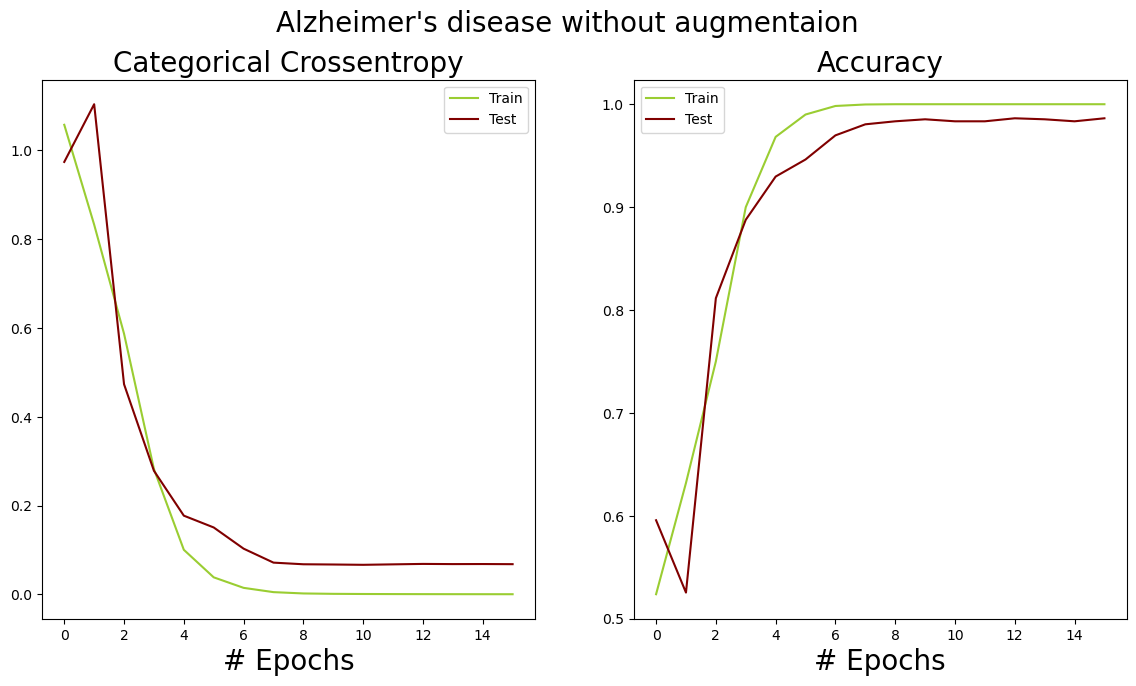

In [135]:
# Plot Crossentropy and Accuracy by epoch
functions.evaluation_plots(h, 'Alzheimer\'s disease without augmentaion')

Accuracy_score: 0.9863 



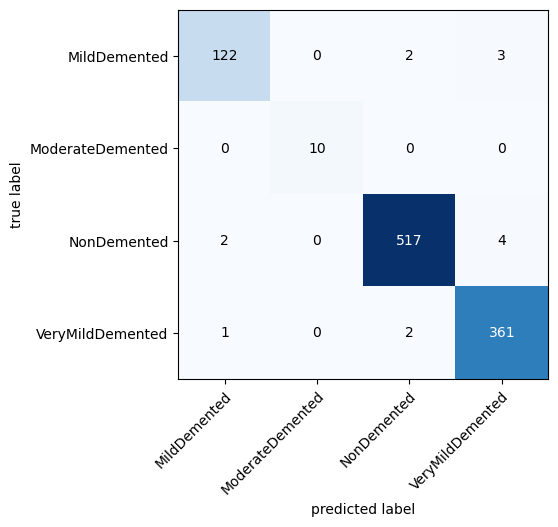

In [136]:
# Plot Confusion Matrix for Validation set
functions.acc_conf_matrix(al_val_ds, model)

The model performs very well on the validating set. I will bring separate test set to check it.

Surprisingly the least common class - Moderate Demented is spot on - I will not need to do resampling. However, the model does not perform great on the test set overall, I will try to add Dropouts to reduce overfitting.

In [44]:
es = EarlyStopping(patience = 5)

model = Sequential()


model.add(layers.Input(shape=(image_size, image_size, 1)))
model.add(layers.Rescaling(1./255))

#First Convolution
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#Second Convolution
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#Flatten
model.add(Flatten())
# Fully Connected
model.add(Dense(64, activation = 'relu'))
model.add(Dense(4, activation='softmax'))

# Compile
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

h = model.fit(al_train_ds, validation_data = al_val_ds, epochs=50, callbacks = [es])

Epoch 1/50
65/65 [==============================] - 116s 2s/step - loss: 1.0791 - accuracy: 0.4960 - val_loss: 0.9815 - val_accuracy: 0.5479
Epoch 2/50
65/65 [==============================] - 105s 2s/step - loss: 0.9441 - accuracy: 0.5511 - val_loss: 0.9052 - val_accuracy: 0.5732
Epoch 3/50
65/65 [==============================] - 101s 2s/step - loss: 0.8711 - accuracy: 0.5897 - val_loss: 0.8992 - val_accuracy: 0.5957
Epoch 4/50
65/65 [==============================] - 100s 2s/step - loss: 0.7843 - accuracy: 0.6471 - val_loss: 0.7298 - val_accuracy: 0.6631
Epoch 5/50
65/65 [==============================] - 99s 2s/step - loss: 0.5958 - accuracy: 0.7584 - val_loss: 0.6398 - val_accuracy: 0.7256
Epoch 6/50
65/65 [==============================] - 101s 2s/step - loss: 0.3691 - accuracy: 0.8616 - val_loss: 0.3180 - val_accuracy: 0.8799
Epoch 7/50
65/65 [==============================] - 102s 2s/step - loss: 0.1654 - accuracy: 0.9443 - val_loss: 0.2040 - val_accuracy: 0.9258
Epoch 8/50
65/

---

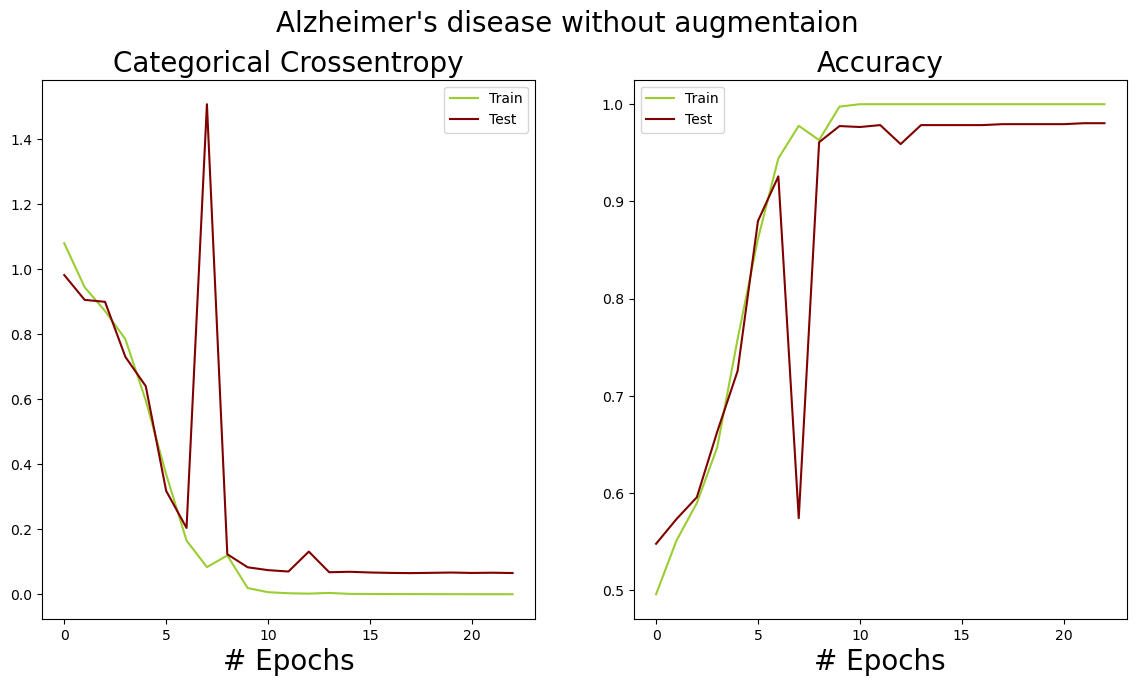

In [45]:
# Plot Crossentropy and Accuracy by epoch
functions.evaluation_plots(h, 'Alzheimer\'s disease without augmentaion')

Accuracy_score: 0.9805 



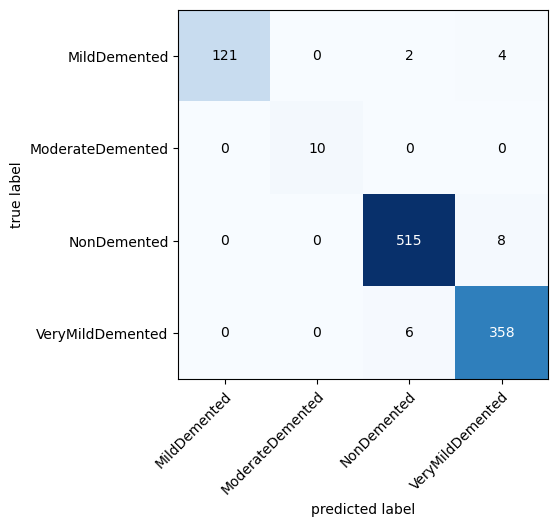

In [46]:
# Plot Confusion Matrix for Validation set
acc_conf_matrix(model, val_data=al_val_ds)

Accuracy_score: 0.6427 



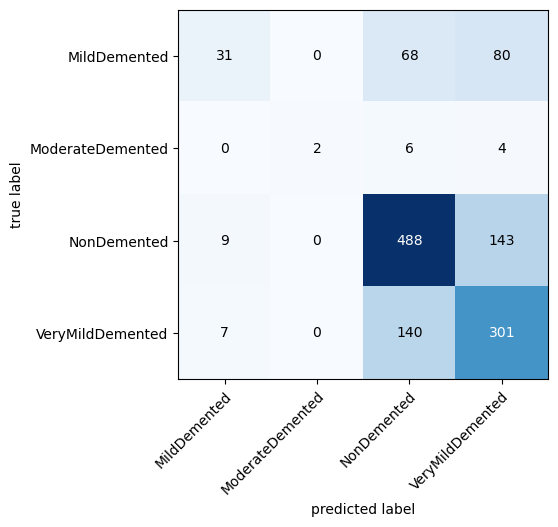

In [47]:
# Plot Confusion Matrix for Testing data
acc_conf_matrix(model, val_data=al_test_ds)

## Model with dropouts

In [34]:
es = EarlyStopping(patience = 5, restore_best_weights=True)
model = Sequential()
model.add(layers.Input(shape=(image_size, image_size, 1)))
model.add(layers.Rescaling(1./255))
model.add(Conv2D(64,kernel_size = (2,2),strides = (1,1),activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(64,kernel_size = (2,2),strides = (1,1),activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(128,kernel_size = (2,2),strides = (1,1),activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(256,kernel_size = (2,2),strides = (1,1),activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(512,kernel_size = (2,2),strides = (1,1),activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2),strides = (2,2)))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(256, activation="linear", kernel_regularizer=l2(0.005)))
model.add(Dropout(0.2))
model.add(Dense(256, activation="linear", kernel_regularizer=l2(0.005)))
model.add(Dropout(0.2))
model.add(Dense(4, activation='softmax'))
# Compile
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

h = model.fit(al_train_ds, validation_data = al_val_ds, epochs=50, callbacks = [es])

Epoch 1/50
65/65 [==============================] - 194s 3s/step - loss: 2.2529 - accuracy: 0.4777 - val_loss: 1.5530 - val_accuracy: 0.5107
Epoch 2/50
65/65 [==============================] - 194s 3s/step - loss: 1.3445 - accuracy: 0.4950 - val_loss: 1.1915 - val_accuracy: 0.5117
Epoch 3/50
65/65 [==============================] - 190s 3s/step - loss: 1.1186 - accuracy: 0.5380 - val_loss: 1.1137 - val_accuracy: 0.5088
Epoch 4/50
65/65 [==============================] - 190s 3s/step - loss: 1.0335 - accuracy: 0.5616 - val_loss: 1.2755 - val_accuracy: 0.4043
Epoch 5/50
65/65 [==============================] - 187s 3s/step - loss: 0.9778 - accuracy: 0.5917 - val_loss: 1.0181 - val_accuracy: 0.5303
Epoch 6/50
65/65 [==============================] - 188s 3s/step - loss: 0.9427 - accuracy: 0.5987 - val_loss: 0.9138 - val_accuracy: 0.5859
Epoch 7/50
65/65 [==============================] - 188s 3s/step - loss: 0.8903 - accuracy: 0.6183 - val_loss: 0.9999 - val_accuracy: 0.5879
Epoch 8/50
65

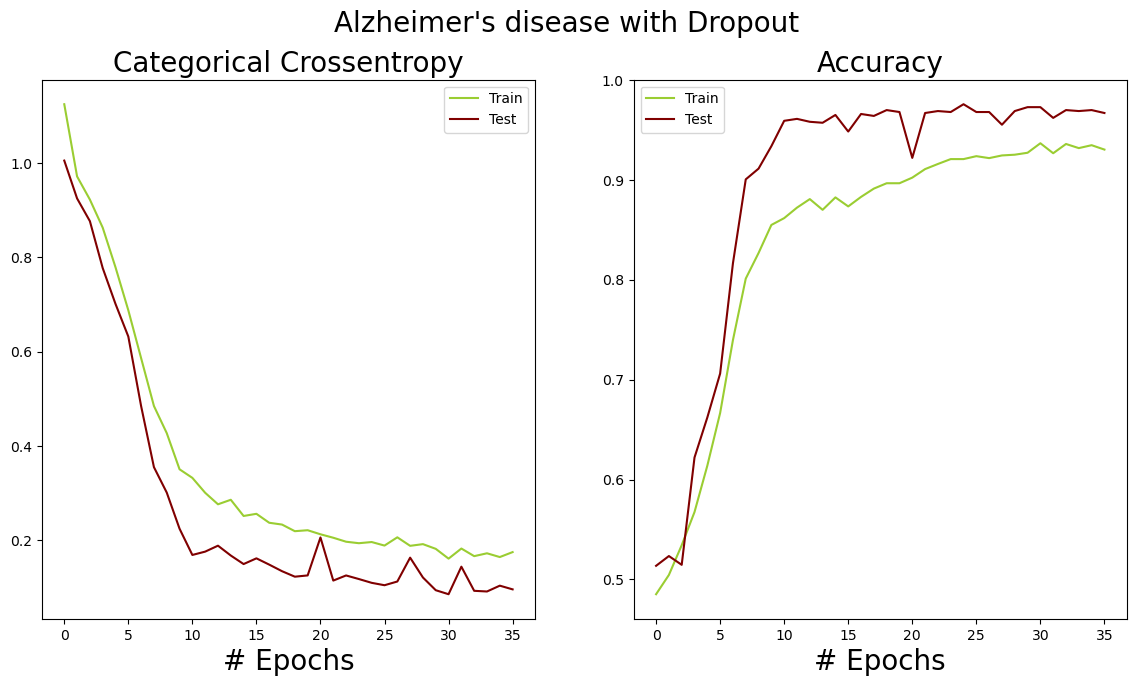

In [139]:
# Plot Crossentropy and Accuracy by epoch
functions.evaluation_plots(h, 'Alzheimer\'s disease with Dropout')

Accuracy_score: 0.9668 



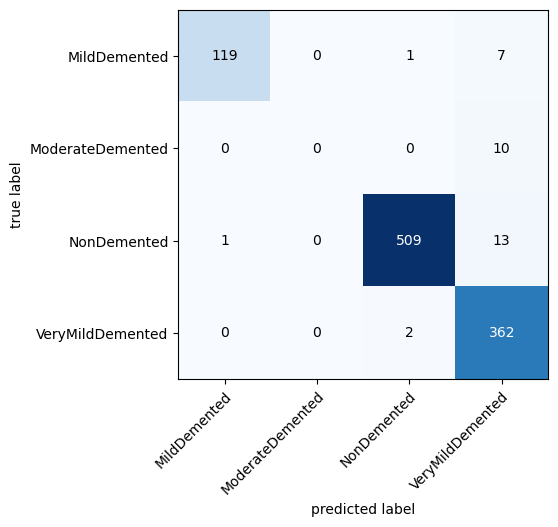

In [140]:
# Plot Confusion Matrix
functions.acc_conf_matrix(al_val_ds, model)

Accuracy on the validation set is very high again

Accuracy_score: 0.5715 



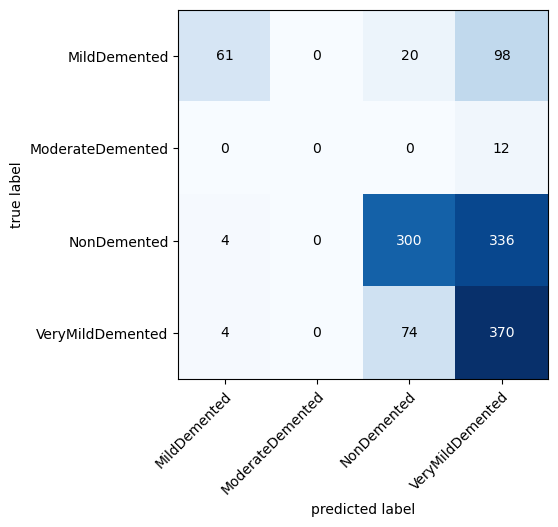

In [141]:
# Plot Confusion Matrix 
functions.acc_conf_matrix(al_test_ds, model)

The accuracy on testing set is even a bit lower, than for the model withot dropouts

## Model with Dropuot and regularization

In [142]:
es = EarlyStopping(patience = 5)

model = Sequential()


model.add(layers.Input(shape=(image_size, image_size, 1)))
model.add(layers.Rescaling(1./255))

#First Convolution
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(.2))
#Second Convolution
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(.2))
#Third Convolution
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(.2))
#Flatten
model.add(Flatten())
# Fully Connected
model.add(Dense(32, activation = 'relu', kernel_regularizer=l2(0.005)))
model.add(Dropout(.2))
model.add(Dense(32, activation = 'relu', kernel_regularizer=l2(0.005)))
model.add(Dropout(.2))
model.add(Dense(4, activation='softmax'))

# Compile
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

h = model.fit(al_train_ds, validation_data = al_val_ds, epochs=50, callbacks = [es])

Epoch 1/50
129/129 [==============================] - 91s 683ms/step - loss: 1.2787 - accuracy: 0.4806 - val_loss: 1.2136 - val_accuracy: 0.5137
Epoch 2/50
129/129 [==============================] - 89s 686ms/step - loss: 1.0997 - accuracy: 0.5050 - val_loss: 1.1597 - val_accuracy: 0.4980
Epoch 3/50
129/129 [==============================] - 90s 697ms/step - loss: 1.0734 - accuracy: 0.5013 - val_loss: 1.0569 - val_accuracy: 0.5547
Epoch 4/50
129/129 [==============================] - 89s 687ms/step - loss: 0.9978 - accuracy: 0.5480 - val_loss: 1.0562 - val_accuracy: 0.5469
Epoch 5/50
129/129 [==============================] - 87s 675ms/step - loss: 0.9505 - accuracy: 0.5853 - val_loss: 0.8855 - val_accuracy: 0.6211
Epoch 6/50
129/129 [==============================] - 89s 691ms/step - loss: 0.9134 - accuracy: 0.5985 - val_loss: 0.8509 - val_accuracy: 0.6396
Epoch 7/50
129/129 [==============================] - 87s 676ms/step - loss: 0.8596 - accuracy: 0.6319 - val_loss: 0.8086 - val_ac

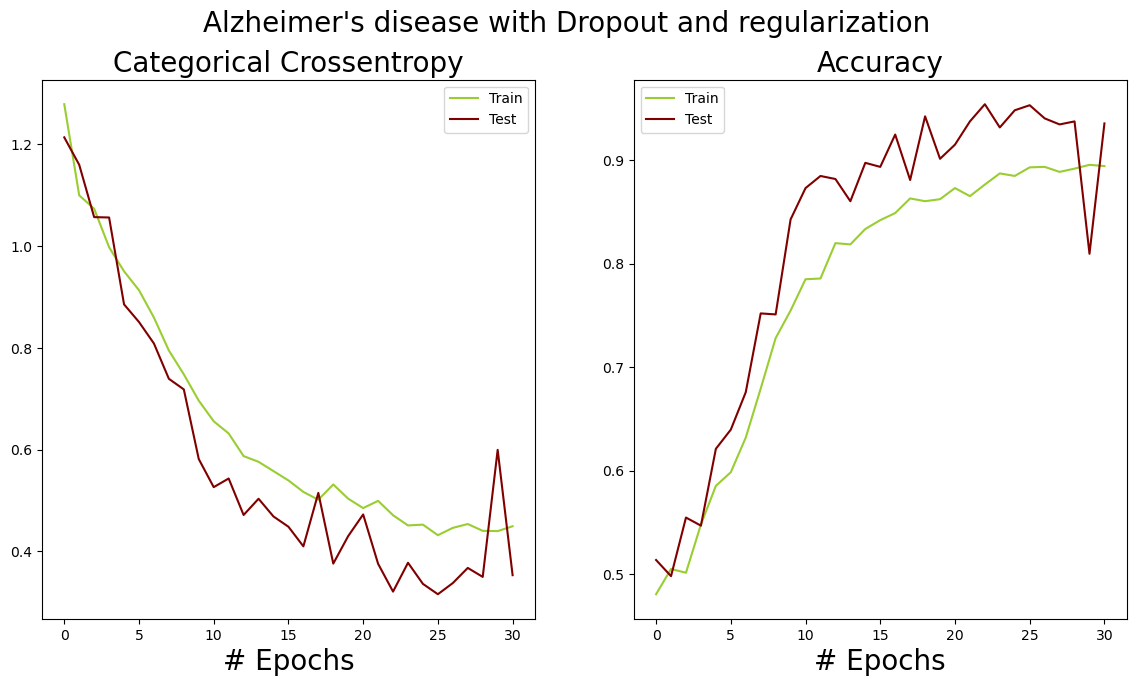

In [143]:
# Plot Crossentropy and Accuracy by epoch
functions.evaluation_plots(h, 'Alzheimer\'s disease with Dropout and regularization')

Accuracy_score: 0.9355 



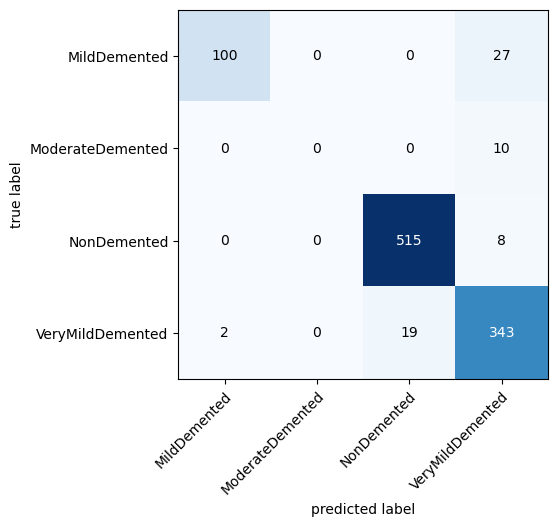

In [144]:
# Plot Confusion Matrix
functions.acc_conf_matrix(al_val_ds, model)

My model performs worser on validation set

Accuracy_score: 0.5715 



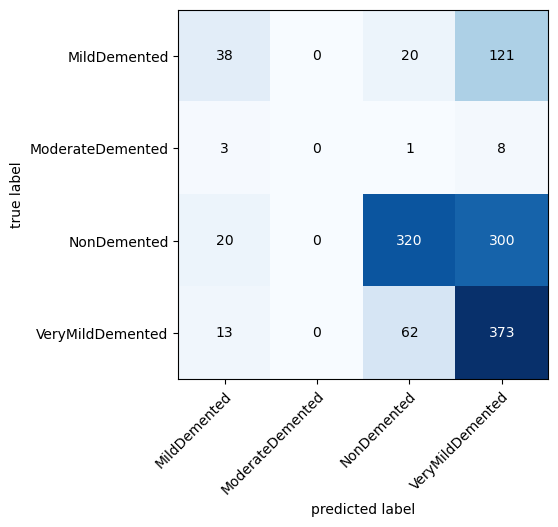

In [145]:
# Plot Confusion Matrix 
functions.acc_conf_matrix(al_test_ds, model)

Adding dropouts and regularisation did not improve my model's prediction on the unseen data. I will try pre-trained models to try and get better results

# Pre-trained models

Pre-trained models requare color images I will have to read the images separately and convert each to RGB

In [11]:
# Read the images, convert to greyscale and prepare for Tensorflow models
X_train, X_val, y_train, y_val = functions.read_grey_images_to_rgb('../data/alzheimer/train')

# Check the shape of the data
X_train.shape, y_train.shape

((3840, 240, 240, 3), (3840, 4))

In [12]:
# Prepare the training data for predictions
X_test, y_test = functions.read_grey_images_to_rgb('../data/alzheimer/test', train_test = False)

# Check the shape of the data
X_test.shape, y_test.shape

((1279, 240, 240, 3), (1279, 4))

---

## EfficientNetV2S

In [13]:
effnet = EfficientNetV2S(
    include_top=False,
    weights="imagenet",
    input_shape=(image_size, image_size, 3),
    classes=4,
    classifier_activation="softmax",
    include_preprocessing=True,
)

In [14]:
# Freeze last 5 layers
for layer in effnet.layers[:-5]:
    layer.trainable = False

In [15]:
es = EarlyStopping(patience = 5)

model = Sequential()

model.add(effnet)
model.add(GlobalAveragePooling2D())

#Just use a single output layer
model.add(Dense(4, activation='softmax'))

# Compile
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

h_efv2s = model.fit(X_train, y_train, validation_data = (X_val, y_val), epochs=50, callbacks = [es])

Epoch 1/50
120/120 [==============================] - 361s 3s/step - loss: 0.9343 - accuracy: 0.5565 - val_loss: 0.8472 - val_accuracy: 0.6292
Epoch 2/50
120/120 [==============================] - 327s 3s/step - loss: 0.7981 - accuracy: 0.6404 - val_loss: 0.7944 - val_accuracy: 0.6440
Epoch 3/50
120/120 [==============================] - 337s 3s/step - loss: 0.7514 - accuracy: 0.6602 - val_loss: 0.6934 - val_accuracy: 0.7041
Epoch 4/50
120/120 [==============================] - 347s 3s/step - loss: 0.7034 - accuracy: 0.6914 - val_loss: 0.6978 - val_accuracy: 0.6753
Epoch 5/50
120/120 [==============================] - 338s 3s/step - loss: 0.6841 - accuracy: 0.7065 - val_loss: 0.6670 - val_accuracy: 0.6971
Epoch 6/50
120/120 [==============================] - 334s 3s/step - loss: 0.6396 - accuracy: 0.7190 - val_loss: 0.6754 - val_accuracy: 0.7112
Epoch 7/50
120/120 [==============================] - 339s 3s/step - loss: 0.6095 - accuracy: 0.7214 - val_loss: 0.5870 - val_accuracy: 0.7408

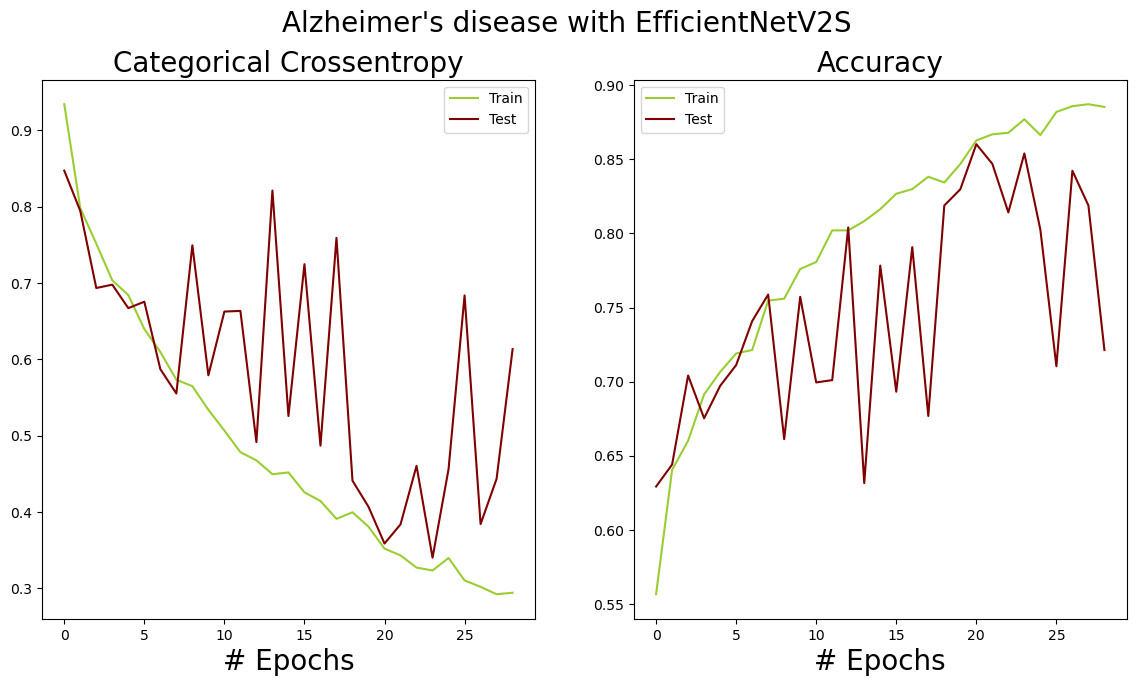

In [17]:
# Plot Crossentropy and Accuracy by epoch
functions.evaluation_plots(h_efv2s, 'Alzheimer\'s disease with EfficientNetV2S')

In [19]:
from tensorflow.math import confusion_matrix
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix
import numpy as np
from sklearn.metrics import accuracy_score
from os import listdir
from tensorflow.image import grayscale_to_rgb
from tensorflow import convert_to_tensor
from tensorflow.io import read_file, decode_jpeg
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.image import resize

def acc_conf_matrix(model, val_data=None, X=None, y=None, class_names_list = None):
    '''
    '''
    # Generate Confusion Matrix
    predictions = np.array([])
    labels =  np.array([])
    if val_data == None:
        predictions = np.concatenate([predictions, model.predict(X, verbose = False).argmax(axis=1)])
        labels = np.concatenate([labels, np.argmax(y, axis=-1)])

    else:
        for x, y in val_data:
            predictions = np.concatenate([predictions, model.predict(x, verbose = False).argmax(axis=1)])
            labels = np.concatenate([labels, np.argmax(y.numpy(), axis=-1)])
    cm = confusion_matrix(labels=labels, predictions=predictions).numpy()
    # Print Accuracy score
    acc = round(accuracy_score(labels, predictions), 4)
    print(f'Accuracy_score: {acc} \n') 
    # Plot the confusion matrix
    if class_names_list:
        fig, ax = plot_confusion_matrix(cm, class_names=class_names_list)    
    else:
        fig, ax = plot_confusion_matrix(cm, class_names=val_data.class_names)

Accuracy_score: 0.7213 



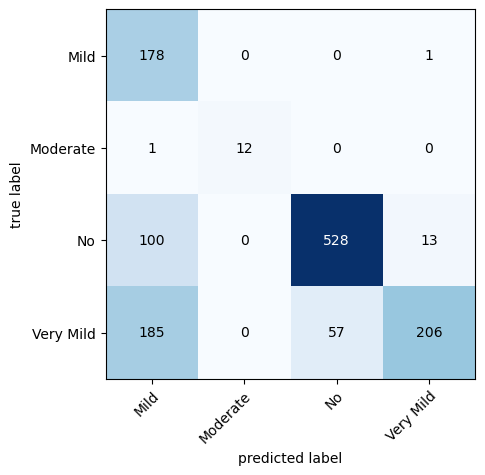

In [20]:
# Validating set Plot Confusion Matrix and print Accuracy
acc_conf_matrix(model, X=X_val, y=y_val, class_names_list =  ['Mild', 'Moderate', 'No', 'Very Mild'])

Accuracy_score: 0.5801 



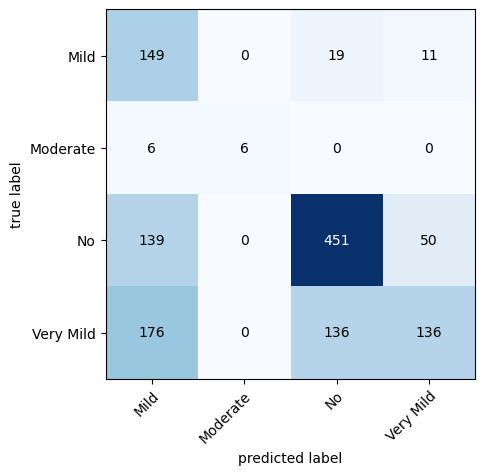

In [21]:
# Testing set Plot Confusion Matrix and print Accuracy
acc_conf_matrix(model, X=X_test, y=y_test, class_names_list =  ['Mild', 'Moderate', 'No', 'Very Mild'])

EfficientNetV2S struggles to distinguish No Alzheimer and Very Mild Alzheimer and also Mild and Very Mild Alzheimer.

In [82]:
#model.save('../models/al_EfficientNetV2S.hdf5')

---

## Xception

In [22]:
xception_model = Xception(
    include_top=False,
    weights="imagenet",
    input_shape=(image_size, image_size, 3),
    classes=4,
    classifier_activation="softmax"
)

In [23]:
# Freeze last 5 layers
for layer in xception_model.layers[:-5]:
    layer.trainable = False

In [24]:
es = EarlyStopping(patience = 5, restore_best_weights=True)

model = Sequential()

model.add(xception_model)
model.add(GlobalAveragePooling2D())

#Just use a single output layer
model.add(Dense(4, activation='softmax'))

# Compile
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

h_xc = model.fit(X_train, y_train, validation_data = (X_val, y_val), epochs=50, callbacks = [es])

Epoch 1/50
120/120 [==============================] - 198s 2s/step - loss: 0.8951 - accuracy: 0.5651 - val_loss: 1.0068 - val_accuracy: 0.6112
Epoch 2/50
120/120 [==============================] - 199s 2s/step - loss: 0.7774 - accuracy: 0.6479 - val_loss: 0.8208 - val_accuracy: 0.6448
Epoch 3/50
120/120 [==============================] - 200s 2s/step - loss: 0.6812 - accuracy: 0.7013 - val_loss: 1.4127 - val_accuracy: 0.5566
Epoch 4/50
120/120 [==============================] - 199s 2s/step - loss: 0.5576 - accuracy: 0.7680 - val_loss: 0.9244 - val_accuracy: 0.5933
Epoch 5/50
120/120 [==============================] - 199s 2s/step - loss: 0.4777 - accuracy: 0.8029 - val_loss: 0.8489 - val_accuracy: 0.6542
Epoch 6/50
120/120 [==============================] - 199s 2s/step - loss: 0.3704 - accuracy: 0.8518 - val_loss: 0.7360 - val_accuracy: 0.6784
Epoch 7/50
120/120 [==============================] - 200s 2s/step - loss: 0.3146 - accuracy: 0.8766 - val_loss: 0.7518 - val_accuracy: 0.7057

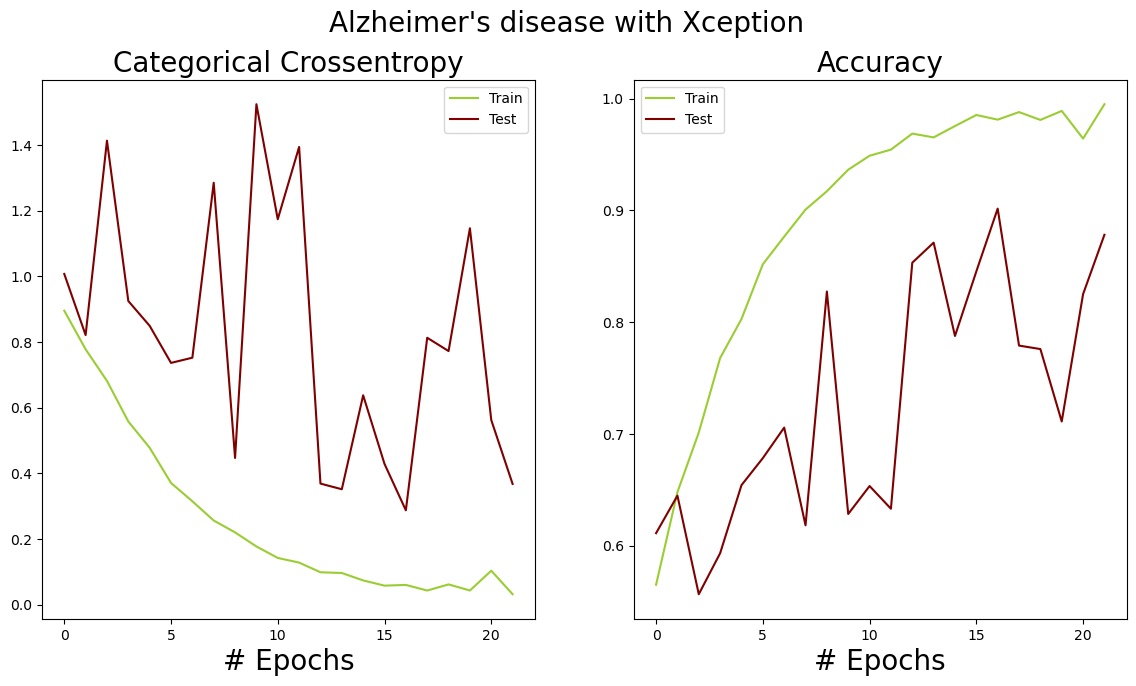

In [25]:
# Plot Crossentropy and Accuracy by epoch
functions.evaluation_plots(h_xc, 'Alzheimer\'s disease with Xception')

Accuracy_score: 0.8782 



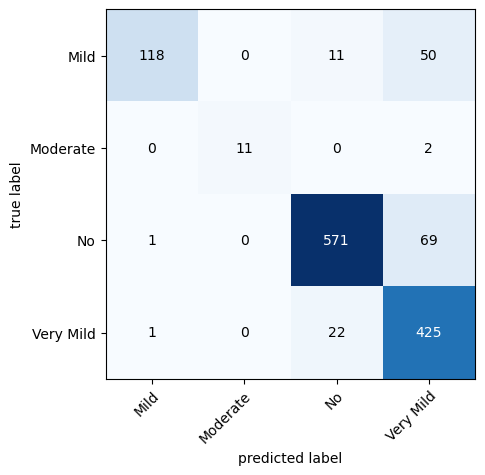

In [27]:
# Plot Confusion Matrix and print Accuracy
acc_conf_matrix(model, X=X_val, y=y_val, class_names_list =  ['Mild', 'Moderate', 'No', 'Very Mild'])

This model struggles to classify Very Mild Alzheimer.

Accuracy_score: 0.595 



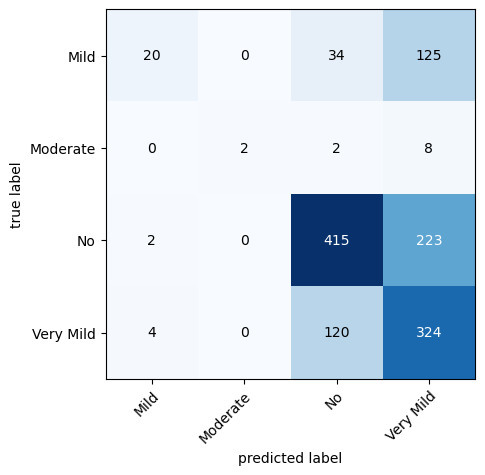

In [28]:
# Plot Confusion Matrix 
acc_conf_matrix(model, X=X_test, y=y_test, class_names_list =  ['Mild', 'Moderate', 'No', 'Very Mild'])

The predictions are hardly over 50% base line 

In [26]:
#model.save('../models/al_Xception.hdf5')

In [26]:
from tensorflow.math import confusion_matrix
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix
import numpy as np
from sklearn.metrics import accuracy_score
from os import listdir
from tensorflow.image import grayscale_to_rgb
from tensorflow import convert_to_tensor
from tensorflow.io import read_file, decode_jpeg
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.image import resize



def read_grey_images_to_rgb(path, train_test = True):
    '''
    Read Greyscale images from a directory and convert them to RGB
    Input: 
    path - str, the path to the images
    train_test - bool, Default True. Controls the spliting of the data, if False - no split
    Return: X_train, X_val, y_train, y_val - four arrays ready for TensorFlow models (if train_test = True) or X_test, y_test - two arrays ready for predicting
    '''
    X = []
    y = []

    # Labels from the folder names
    for num_label, label in enumerate(listdir(path)):
        # Change each image and append to X and y
        for image in listdir(f'{path}/{label}'):
            if '.jpg' in image:
                img = read_file(f'{path}/{label}/{image}')  
                img = decode_jpeg(img, channels=1)
                img = resize(img,[image_size, image_size])
                img = convert_to_tensor(img[:,:,:1])     # updated
                # Make image RGB for pre-trained models
                img = grayscale_to_rgb(img, name=None)
                X.append(img)
                y.append(num_label)
    # For training the model
    if train_test:
        X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=18, stratify=y) 
        
        # Change for TensorFlow models
        X_train = np.array(X_train, dtype='float32')
        X_val = np.array(X_val, dtype='float32')

        y_train = to_categorical(y_train, num_classes=4, dtype='float32')
        y_val = to_categorical(y_val, num_classes=4, dtype='float32')

        return X_train, X_val, y_train, y_val
    # For testing
    else:
        X_test = np.array(X, dtype='float32')
        y_test = to_categorical(y, num_classes=4, dtype='float32')
        return X_test, y_test

In [27]:
# Read the images, convert to greyscale and prepare for Tensorflow models
X_train, X_val, y_train, y_val = read_grey_images_to_rgb('../data/alzheimer/train')

# Check the shape of the data
X_train.shape, y_train.shape

((3840, 240, 240, 3), (3840, 4))

In [28]:
# Prepare the training data for predictions
X_test, y_test = read_grey_images_to_rgb('../data/alzheimer/test', train_test = False)

# Check the shape of the data
X_test.shape, y_test.shape

((1279, 240, 240, 3), (1279, 4))

In [29]:
from tensorflow.keras.applications import resnet50

rn_model = resnet50.ResNet50(
    include_top=False,
    weights="imagenet",
    input_shape=(image_size, image_size, 3),
    classes=4,
    classifier_activation="softmax"
)

In [30]:

for layer in rn_model.layers:
    layer.trainable = False

In [32]:
es = EarlyStopping(patience = 5, restore_best_weights=True)

model = Sequential()

model.add(rn_model)
model.add(Flatten())

#Just use a single output layer
model.add(Dense(4, activation='softmax'))

# Compile
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

h_rn = model.fit(X_train, y_train, validation_data = (X_val, y_val), epochs=50, callbacks = [es])

Epoch 1/50
120/120 [==============================] - 380s 3s/step - loss: 5.2764 - accuracy: 0.5997 - val_loss: 1.6225 - val_accuracy: 0.7018
Epoch 2/50
120/120 [==============================] - 388s 3s/step - loss: 0.7296 - accuracy: 0.8518 - val_loss: 0.8015 - val_accuracy: 0.8368
Epoch 3/50
120/120 [==============================] - 381s 3s/step - loss: 0.7441 - accuracy: 0.8656 - val_loss: 0.7648 - val_accuracy: 0.8673
Epoch 4/50
120/120 [==============================] - 373s 3s/step - loss: 0.3070 - accuracy: 0.9367 - val_loss: 1.8573 - val_accuracy: 0.7931
Epoch 5/50
120/120 [==============================] - 371s 3s/step - loss: 0.1566 - accuracy: 0.9612 - val_loss: 1.3677 - val_accuracy: 0.7822
Epoch 6/50
120/120 [==============================] - 374s 3s/step - loss: 0.1997 - accuracy: 0.9602 - val_loss: 0.4863 - val_accuracy: 0.9016
Epoch 7/50
120/120 [==============================] - 371s 3s/step - loss: 0.1009 - accuracy: 0.9734 - val_loss: 0.4176 - val_accuracy: 0.9157

Accuracy_score: 0.6654 



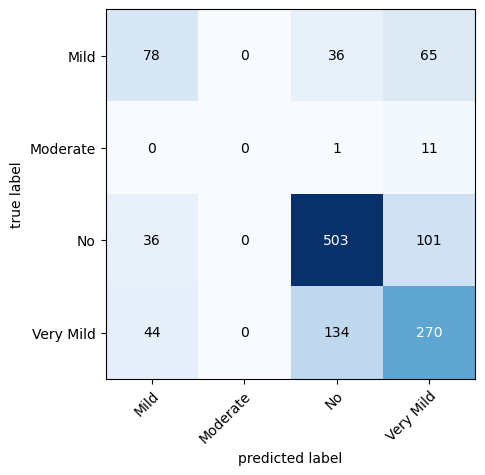

In [33]:
# Plot Confusion Matrix 
functions.acc_conf_matrix(model, X=X_test, y=y_test, class_names_list =  ['Mild', 'Moderate', 'No', 'Very Mild'])

## ResNet50

In [16]:
from tensorflow.keras.applications import resnet50

rn_model = resnet50.ResNet50(
    include_top=False,
    weights="imagenet",
    input_shape=(image_size, image_size, 3),
    classes=4,
    classifier_activation="softmax"
)

94765736/94765736 [==============================] - 3s 0us/step


In [17]:

for layer in rn_model.layers:
    layer.trainable = False

In [18]:
es = EarlyStopping(patience = 5, restore_best_weights=True)

model = Sequential()

model.add(rn_model)
model.add(Flatten())

#Just use a single output layer
model.add(Dense(4, activation='softmax'))

# Compile
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

h_rn = model.fit(X_train, y_train, validation_data = (X_val, y_val), epochs=50, callbacks = [es])

Epoch 1/50
120/120 [==============================] - 587s 5s/step - loss: 4.8851 - accuracy: 0.6180 - val_loss: 2.5708 - val_accuracy: 0.6901
Epoch 2/50
120/120 [==============================] - 587s 5s/step - loss: 0.9690 - accuracy: 0.8341 - val_loss: 1.6726 - val_accuracy: 0.7252
Epoch 3/50
120/120 [==============================] - 574s 5s/step - loss: 0.9667 - accuracy: 0.8529 - val_loss: 0.9676 - val_accuracy: 0.8470
Epoch 4/50
120/120 [==============================] - 586s 5s/step - loss: 0.6409 - accuracy: 0.8951 - val_loss: 1.4383 - val_accuracy: 0.8205
Epoch 5/50
120/120 [==============================] - 585s 5s/step - loss: 0.6162 - accuracy: 0.9036 - val_loss: 0.9852 - val_accuracy: 0.8767
Epoch 6/50
120/120 [==============================] - 579s 5s/step - loss: 0.1398 - accuracy: 0.9724 - val_loss: 1.2213 - val_accuracy: 0.8407
Epoch 7/50
120/120 [==============================] - 661s 6s/step - loss: 0.0502 - accuracy: 0.9865 - val_loss: 0.5579 - val_accuracy: 0.9016

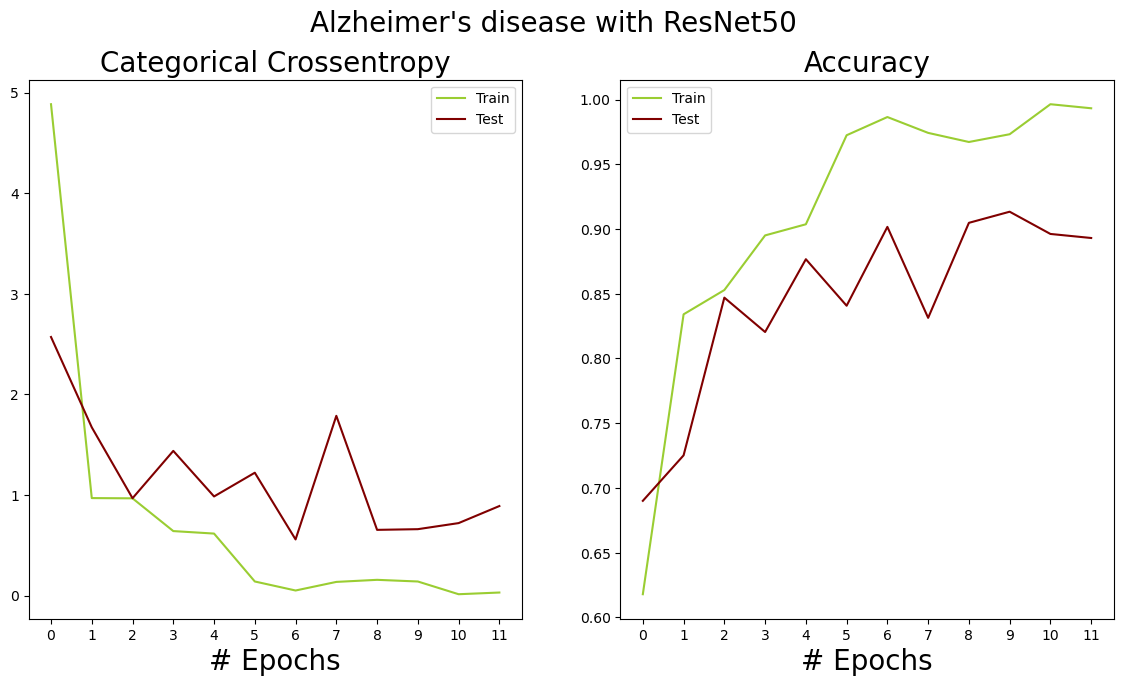

In [23]:
# Plot Crossentropy and Accuracy by epoch
functions.evaluation_plots(h_rn, 'Alzheimer\'s disease with ResNet50')

Accuracy_score: 0.9016 



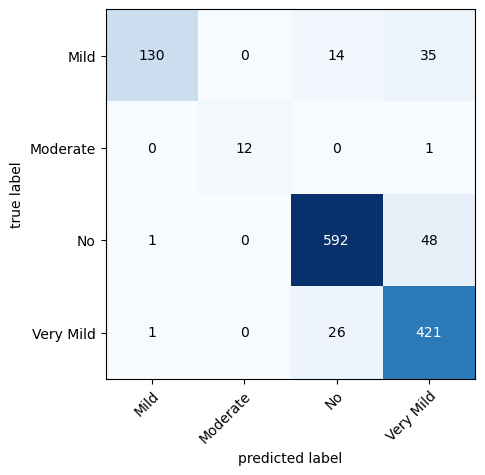

In [21]:
# Plot Confusion Matrix 
functions.acc_conf_matrix(model, X=X_val, y=y_val, class_names_list =  ['Mild', 'Moderate', 'No', 'Very Mild'])

Accuracy_score: 0.6724 



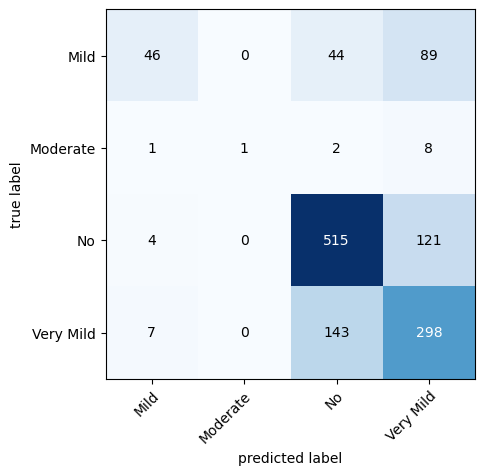

In [20]:
# Plot Confusion Matrix 
functions.acc_conf_matrix(model, X=X_test, y=y_test, class_names_list =  ['Mild', 'Moderate', 'No', 'Very Mild'])

---

The CNN and EfficientNetV2S were the best models so far with about 60% accuracy. EfficientNetV2S took a long time to train to get to this accuracy. My training accuracy is much higher. I will need to combat overfitting.
In the next notebook I will use the same models on Brain Tumor data.